<h2>Data Analysis and Machine Learning on Test Scores Dataset</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Data Analysis</h3>

In [2]:
data = pd.read_csv('test_scores.csv')
data = data.sample(frac=1, random_state=0).reset_index(drop=True) # shuffling ordered data
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ZMNYA,Suburban,Public,1UU,Experimental,24.0,VNYVB,Female,Does not qualify,62.0,79.0
1,DNQDD,Suburban,Public,ROP,Experimental,28.0,34LDX,Male,Qualifies for reduced/free lunch,58.0,74.0
2,GOOBU,Urban,Public,18K,Standard,31.0,F1JQ8,Male,Qualifies for reduced/free lunch,50.0,56.0
3,KFZMY,Urban,Non-public,1VD,Experimental,27.0,270VO,Male,Qualifies for reduced/free lunch,39.0,59.0
4,CUQAM,Urban,Public,BFY,Standard,27.0,3SRQL,Female,Does not qualify,53.0,57.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


2133 samples, 11 features (1 target) and no missing data. 

In [4]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


Students did better at posttest. 75% of students scored below 65 at pretest and 77 at posttest. No one scored 100 at pretest, and...

In [5]:
data[data.posttest == 100].shape[0]

8

8 students scored 100 at posttest.

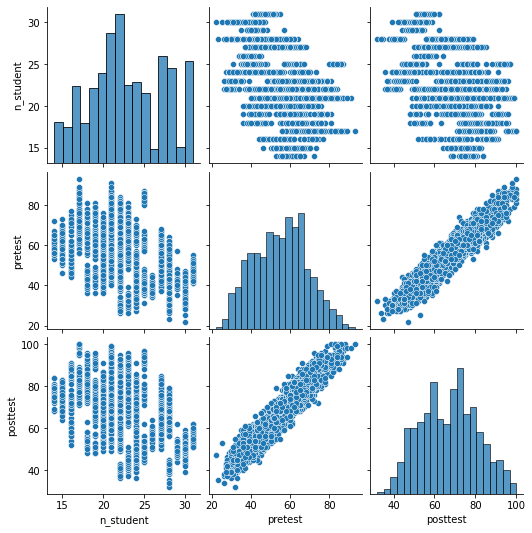

In [6]:
sns.pairplot(data)

pretest and posttest are highly correlated and n_student seem to have negative correlation with pretest & posttest.

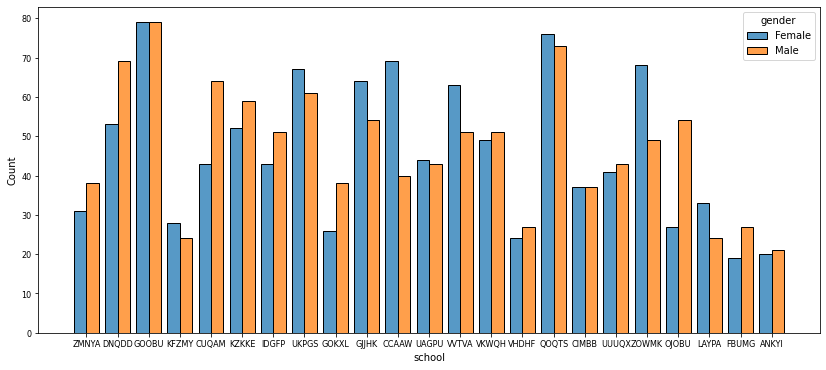

In [7]:
plt.subplots(figsize=(14, 6))
sns.histplot(data, x='school', hue="gender", multiple="dodge", shrink=.8).tick_params(labelsize=8.1)

([<matplotlib.patches.Wedge at 0x13d0190fdc0>,
 [Text(-0.01701070447505092, 1.09986846301422, ''),
  Text(0.017010601497933132, -1.0998684646068724, '')])

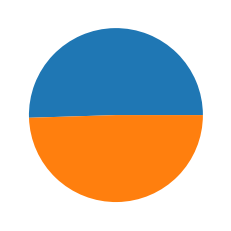

In [8]:
plt.pie(data.gender.value_counts())

Gender distribution is not skewed.

In [9]:
data.school.value_counts().shape[0]

23

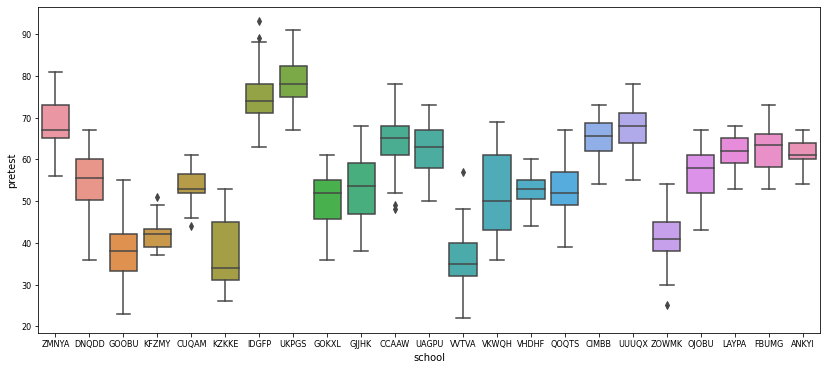

In [10]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data, x='school', y='pretest').tick_params(labelsize=8.1)

UKPGS is the school with highest pretest average, and KZKKE with the lowest.

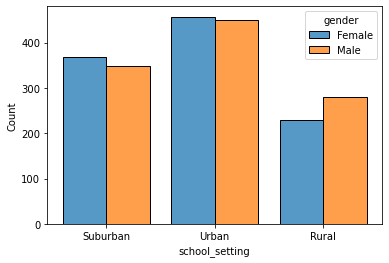

In [11]:
sns.histplot(data, x='school_setting', hue='gender', multiple='dodge', shrink=.8)

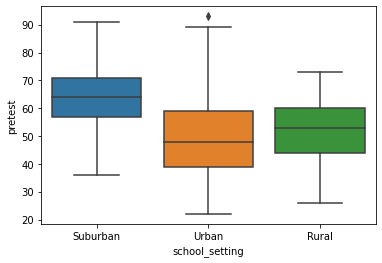

In [12]:
sns.boxplot(data=data, x='school_setting', y='pretest')

Suburban has the greatest pretest average.

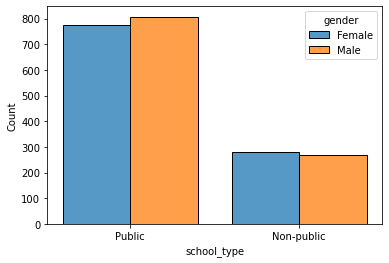

In [13]:
sns.histplot(data, x='school_type', hue='gender', multiple='dodge', shrink=.8)

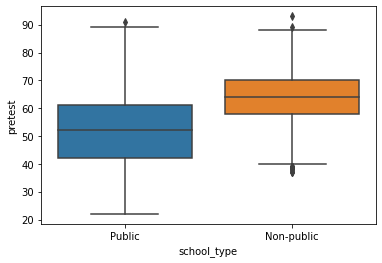

In [14]:
sns.boxplot(data=data, x='school_type', y='pretest')

Non-public schools have better pretest average than public schools.

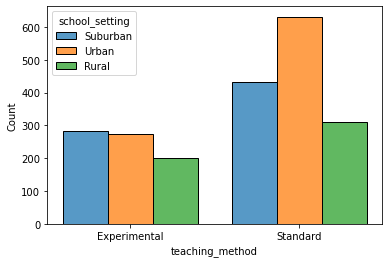

In [15]:
sns.histplot(data, x='teaching_method', hue='school_setting', multiple='dodge', shrink=.8)

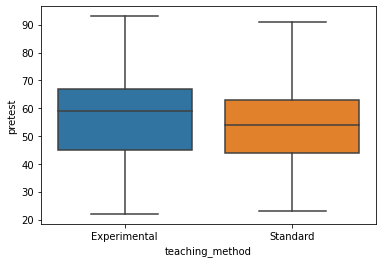

In [16]:
sns.boxplot(data=data, x='teaching_method', y='pretest')

In [17]:
data.lunch.value_counts()

Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64

In [18]:
data_public = data[data.school_type == 'Public']
data_public[data_public.lunch == 'Qualifies for reduced/free lunch'].shape[0] / data_public.shape[0]

0.4804045512010114

In [19]:
data_non_public = data[data.school_type == 'Non-public']
data_non_public[data_non_public.lunch == 'Qualifies for reduced/free lunch'].shape[0] / data_non_public.shape[0]

0.2867513611615245

In public schools, more students are qualified for reduced/free lunch. 

In [20]:
lunch_percentage = data.school[data.lunch == 'Qualifies for reduced/free lunch'].value_counts() / data.school.value_counts()
lunch_percentage.sort_values(ascending=True)

CIMBB    0.013514
UAGPU    0.022989
ANKYI    0.024390
UUUQX    0.059524
QOQTS    0.060403
VKWQH    0.100000
ZMNYA    0.115942
OJOBU    0.135802
CUQAM    0.149533
FBUMG    0.239130
CCAAW    0.486239
DNQDD    0.631148
KFZMY    0.807692
GOKXL    0.812500
GJJHK    0.855932
VHDHF    0.882353
ZOWMK    0.905983
GOOBU    0.917722
VVTVA    0.982456
KZKKE    1.000000
IDGFP         NaN
LAYPA         NaN
UKPGS         NaN
Name: school, dtype: float64

Every student in KZKKE qualifies for reduced/free lunch. In IDGFP, LAYPA and UKPGS, no one qualifies.

Encoding & correlation

In [21]:
data = data.drop(['student_id'], axis=1)
data = pd.get_dummies(data, columns=['school','school_setting','school_type','classroom','teaching_method','gender','lunch'])
data

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,24.0,62.0,79.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,28.0,58.0,74.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,31.0,50.0,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,27.0,39.0,59.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,27.0,53.0,57.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,24.0,33.0,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2129,15.0,53.0,68.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2130,28.0,33.0,40.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2131,26.0,36.0,51.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [27]:
(corr.loc[:,'posttest'] >= .5)

n_student                                 False
pretest                                    True
posttest                                   True
school_ANKYI                              False
school_CCAAW                              False
                                          ...  
teaching_method_Standard                  False
gender_Female                             False
gender_Male                               False
lunch_Does not qualify                     True
lunch_Qualifies for reduced/free lunch    False
Name: posttest, Length: 134, dtype: bool